# Potential of a point source in a semi-sphere embedded in a uniform halfspace 

In [1]:
from sympy import *
import numpy as np

We consider a uniform halfspace with resistivity $\rho_2$. There is a point source $I$ located at the origin. The semi-sphere of radius $a$ has a resistivity of $\rho_1$. The semi-sphere is aligned with the $z$-axis.

We make the ansatz:

$$
\begin{align}
U_1(r) &= \frac{\rho_1 I}{2 \pi r} + A \qquad & r < a \\
U_2(r) &= \frac{\rho_2 B}{2 \pi r} \qquad & r > a
\end{align}
$$

To solve for the unknowns $A$ and $B$ we need the conditions of continuity at the surface of the semisphere, where $r=a$:

$$
\label{eq:contU}
\begin{align}
U_1 & = U_2 \\
\frac{1}{\rho_1} \partial_r U_1 & = \frac{1}{\rho_2} \partial_r U_2
\end{align}
$$

In [2]:
a, r, rho1, rho2, I = symbols('a r rho_1 rho_2 I', real=True, positive=True)
A, B = symbols("A B", real=True)

In [3]:
U_1 = rho1 * I / (2 * pi * r) + A
U_2 = rho2 * B / (2 * pi * r)

In [4]:
dU1dr = diff(U_1, r)
dU2dr = diff(U_2, r)

In [5]:
ex1 = U_1 - U_2
ex2 = dU1dr / rho1 - dU2dr / rho2

In [6]:
sols = solve([ex1.subs(r, a), ex2.subs(r, a)], [A, B])

In [7]:
A_ = sols[A].simplify()
B_ = sols[B].simplify()

In [8]:
U1 = U_1.subs(A, A_)
U2 = U_2.subs(B, B_)

In [9]:
U1

I*rho_1/(2*pi*r) + I*(-rho_1 + rho_2)/(2*pi*a)

In [10]:
U2

I*rho_2/(2*pi*r)

We obtain  the following results:

For $r \le a$ it holds
$$
\label{u1}
U_1(r) = \frac{I \rho_{1}}{2 \pi r} + \frac{I \left(\rho_{2} - \rho_{1}\right)}{2 \pi a}
$$
whereas for $r \ge a$ we find
$$
U_2(r) = \frac{I \rho_{2}}{2 \pi r}
$$


## Verification
Let's check that the potential and the current density are actually continuous at $r=a$.

We first form the respective expressions for $r=a$ and check if the results vanish.

In [11]:
D = U1.subs(r,a) - U2.subs(r,a)
D

I*rho_1/(2*pi*a) - I*rho_2/(2*pi*a) + I*(-rho_1 + rho_2)/(2*pi*a)

In [12]:
D.simplify()

0

This result can be obtained directly by using the expression `ex1` for the continuity of the potential:

In [13]:
ex1.subs(r, a).subs(A, A_).subs(B, B_).simplify()

0

In `ex2` we have used the condition for continuity of the radial component of the current densities:

In [14]:
ex2.subs(r, a).subs(B, B_)

0

Both results indicate that the conditions of continuity are fullfilled.

## Visualization of the result

In [15]:
import matplotlib.pyplot as plt

In [16]:
rho1_n = 100.0
rho2_n = 1000.0
a_n = 3.0

In [17]:
U1_f = lambdify([rho1, rho2, r, a, I], U1)
U2_f = lambdify([rho1, rho2, r, a, I], U2)

In [18]:
R1 = np.arange(1.0, a_n + .01, 0.1)
R2 = np.arange(a_n, 10.0, 0.1)

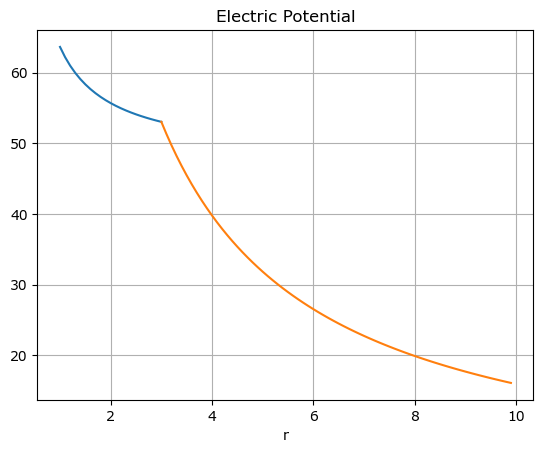

In [19]:
plt.plot(R1, [U1_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R1])
plt.plot(R2, [U2_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R2])
plt.title("Electric Potential")
plt.xlabel("r")
plt.grid(True)
plt.show()

In [20]:
E1_f = lambdify([rho1, rho2, r, a, I], -diff(U1, r))
E2_f = lambdify([rho1, rho2, r, a, I], -diff(U2, r))

j1_f = lambdify([rho1, rho2, r, a, I], -diff(U1, r) / rho1)
j2_f = lambdify([rho1, rho2, r, a, I], -diff(U2, r) / rho2)


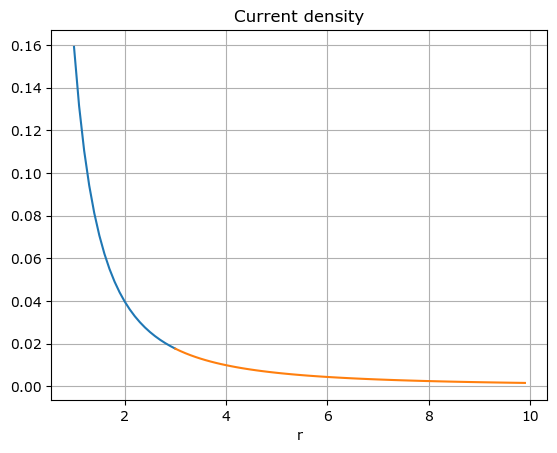

In [21]:
plt.plot(R1, [j1_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R1])
plt.plot(R2, [j2_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R2])
plt.title("Current density")
plt.xlabel("r")
plt.grid(True)
plt.show()

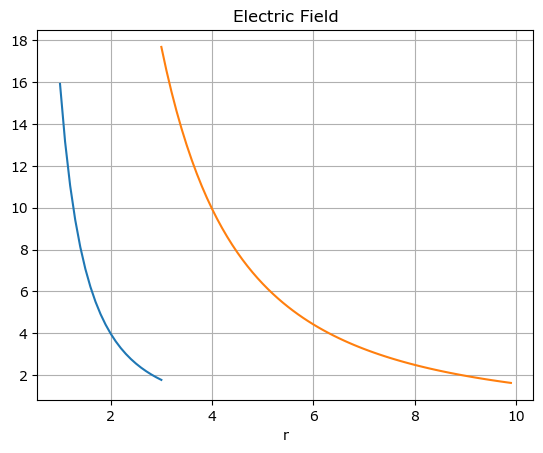

In [22]:
plt.plot(R1, [E1_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R1])
plt.plot(R2, [E2_f(rho1_n, rho2_n, r, a_n, 1.0) for r in R2])
plt.title("Electric Field")
plt.xlabel("r")
plt.grid(True)
plt.show()

The value of `a` a is {eval}`a_n` 